### Global Fishing Watch

In [18]:
import glob
import pandas as pd
import numpy as np

startYear = 2018
endYear = 2019 

def gfwData(startYear = startYear, endYear = endYear):
    
    All_GFW_Grid = pd.DataFrame()
    for year in range(startYear, endYear):

        yearby = glob.glob('Fishing_By_Vessel/' + str(year) + "\*.csv")

        li = []
        for yr in yearby:
            df = pd.read_csv(yr, index_col=None, header=0)
            li.append(df)

        GFW_Year = pd.concat(li, axis=0, ignore_index=True)
        All_GFW_Grid = pd.concat([All_GFW_Grid, GFW_Year])

    All_GFW_Grid.lat_bin = All_GFW_Grid.lat_bin/10
    All_GFW_Grid.lon_bin = All_GFW_Grid.lon_bin/10
    
    return All_GFW_Grid
    
All_GFW_Grid = gfwData()

All_GFW_Grid.head()

,date,lat_bin,lon_bin,mmsi,fishing_hours
0,2018-01-01 00:00:00 UTC,0.0,153.7,510086000,2.730556
1,2018-01-01 00:00:00 UTC,0.0,153.6,510086000,0.615278
2,2018-01-01 00:00:00 UTC,25.6,-156.3,366827010,0.995000
3,2018-01-01 00:00:00 UTC,25.6,-155.1,367396870,1.680000
4,2018-01-01 00:00:00 UTC,25.6,-155.2,367396870,0.399167


### OceanReach

In [ ]:
import pandas as pd
import numpy as np

All_Animals_Oceanreach = pd.read_csv('Oceanreach/All_Animal_Data.csv')
All_Animals_Oceanreach.head()

In [ ]:
import pandas as pd
import numpy as np

Beneath_The_Waves_Sensor = pd.read_csv('Beneath_The_Waves/Beneath_The_Waves.csv').dropna(how='all')
Beneath_The_Waves_Sensor.head(10)

### Beneath the Waves

In [ ]:
Gallagher_Tracks_BTW = pd.read_csv('Beneath_The_Waves/Gallagher_BTW_Tracks.csv') # .iloc[:15359,:]
Gallagher_Tracks_BTW

### Plot GFW BTW / OR

In [ ]:
lats_gfw = np.array(All_GFW_Grid.lat_bin)
lons_gfw = np.array(All_GFW_Grid.lon_bin)
lats_or = np.array(All_Animals_Oceanreach.latitude)
lons_or =np.array(All_Animals_Oceanreach.longitude)
lats_btw = np.array(Gallagher_Tracks_BTW.lat)
lons_btw =np.array(Gallagher_Tracks_BTW.lon)

# # Map Boundaries Southern Chile
# max_lat =  -40 
# min_lat = -60 
# max_lon = -60 
# min_lon = -80 

# Map Boundaries
max_lat =  60
min_lat = -60
max_lon = 180
min_lon = -180

In [ ]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
# from matplotlib import colors,colorbar
# import matplotlib.dates as mdates
# from matplotlib.dates import DateFormatter
# import seaborn as sns
# %matplotlib inline

# sns.set_style("white")
# plt.figure(figsize=(20, 35)) 

# m = Basemap(llcrnrlon = min_lon, llcrnrlat = min_lat,
#             urcrnrlon = max_lon, urcrnrlat = max_lat, projection = 'mill', resolution ='l')

# m.drawmapboundary()
# m.fillcontinents("#cccccc", lake_color = "#cccccc")
# m.drawcountries()

# parallels = np.arange(min_lat, max_lat, 20.)
# m.drawparallels(parallels,labels=[1, 0, 0, 0],fontsize = 18, color = '#cccccc')
# meridians = np.arange(min_lon, max_lon, 20.)
# m.drawmeridians(meridians, labels = [0,0,0,1], fontsize = 18, color = '#cccccc')

# m.drawmapboundary(fill_color = '#000102')
# x,y= m(lons_gfw, lats_gfw)
# size = 2
# m.plot(x, y, marker = 'o', markersize = size, markeredgecolor = 'none',
#        alpha = 1, linestyle = 'None', label = "Global Fishing Watch", color = "green")

# x,y= m(lons_or, lats_or)
# size = 2
# m.plot(x, y,marker = 'o', markersize = size, markeredgecolor = 'none',
#        alpha = 1 ,linestyle = 'None', label = "OceanReach", color = "red")

# x,y= m(lons_btw, lats_btw)
# size = 2
# m.plot(x, y, marker = 'o', markersize = size, markeredgecolor = 'none',
#        alpha = 1, linestyle = 'None', label = "Beneath the Waves", color = "yellow")

# plt.title("GFW / OR / BTW", fontsize = 45)
# plt.legend(fontsize = 24, markerscale = 3)
# plt.show()

## TESTING

### Select Part of Globe and Plot Heatmap

In [3]:
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import widgets
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

lat = widgets.IntRangeSlider(value=[-90, 90],
    min=-90,
    max=90,
    step=1,
    description='Latitude:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
)

lon = widgets.IntRangeSlider(
    value=[-180, 180],
    min=-180,
    max=180,
    step=1,
    description='Longitude:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
)

ui = widgets.HBox([lat, lon])

def draw_screen_poly( lats, lons, m):
        x, y = m( lons, lats )
        xy = zip(x, y)
        poly = Polygon( list(xy), facecolor='red', alpha=0.4 )
        plt.gca().add_patch(poly)
        
def f(lat, lon):

    # Map Boundaries
    max_lon = lon[1]#; print("Max Longitude: ", max_lon)
    min_lon = lon[0]#; print("Min Longitude: ", min_lon)
    max_lat = lat[1]#; print("Max Latitude: ", max_lat)
    min_lat = lat[0]#; print("Min Latitude: ", min_lat)

    lats = [ min_lat, max_lat, max_lat, min_lat ]
    lons = [ min_lon, min_lon, max_lon, max_lon ]

    m = Basemap(projection='cyl',lon_0=0)
    m.drawcoastlines()
    m.drawmapboundary()
    draw_screen_poly( lats, lons, m )
    
    print('('+str(lat)+'),('+str(lon)+')')
    plt.show()
    

out = widgets.interactive_output(f, {'lat': lat, 'lon': lon})

display(ui, out)

Output()

Max Longitude:  180
Min Longitude:  -180
Max Latitude:  90
Min Latitude:  -90
Seconds:  280


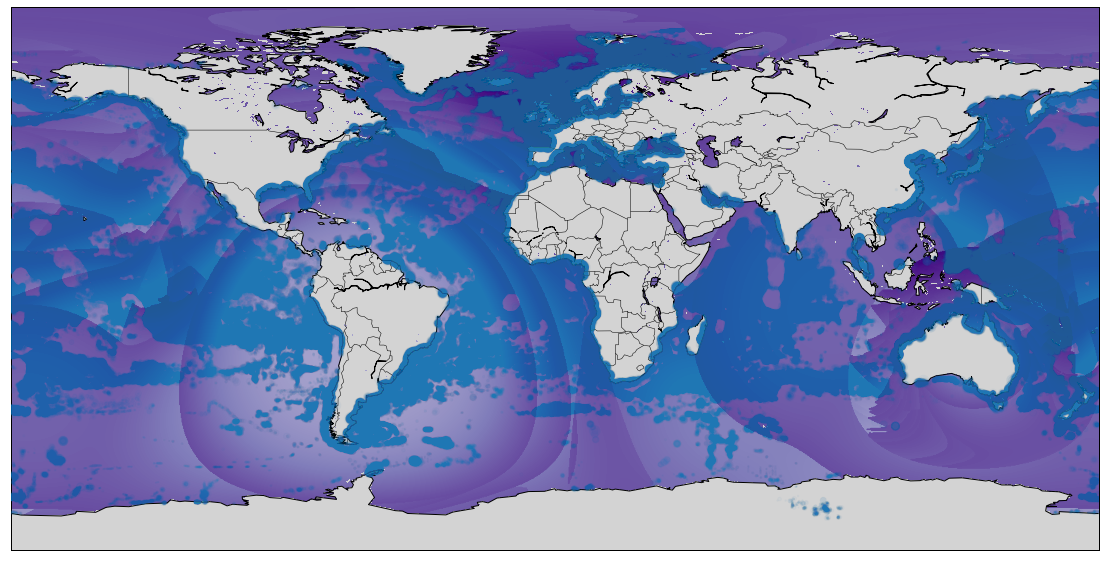

In [26]:
### Detached fetch_species_distribution()

import timeit
start_time = timeit.default_timer()

from sklearn.datasets import fetch_species_distributions
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from sklearn.datasets.species_distributions import construct_grids
from sklearn.neighbors import KernelDensity
from sklearn.datasets.base import Bunch

bandwidth = 0.36

import warnings
warnings.filterwarnings('ignore')

# from sklearn.datasets import fetch_species_distributions
# data = fetch_species_distributions()
        
# Map Boundaries
latlon = eval(out.outputs[0]['text'].rstrip())
max_lon = latlon[1][1]; print("Max Longitude: ", latlon[1][1])
min_lon = latlon[1][0]; print("Min Longitude: ", latlon[1][0])
max_lat = latlon[0][1]; print("Max Latitude: ", latlon[0][1])
min_lat = latlon[0][0]; print("Min Latitude: ", latlon[0][0])

grid_size = 0.05 # Fixed
x_left_lower_corner = min_lon
y_left_lower_corner = min_lat

# Ny = 1592 & Nx = 1212
nearest_twentieth = lambda x: round(x*(1/grid_size)) / (1/grid_size)
Nx = nearest_twentieth((max_lon - (min_lon))/ grid_size) 
Ny = nearest_twentieth((max_lat - (min_lat))/ grid_size)

data = Bunch(x_left_lower_corner  = x_left_lower_corner,
               y_left_lower_corner = y_left_lower_corner,
               Nx = Nx, 
               Ny = Ny,
               grid_size = grid_size)

allData = All_GFW_Grid[['lat_bin','lon_bin','fishing_hours']].dropna()#.iloc[0:2000,:]

# Get matrices/arrays of species IDs and locations
fig, ax = plt.subplots(figsize=(20, 10))

latlon = np.vstack([np.array(allData.lat_bin),
                    np.array(allData.lon_bin)]).T

xgrid, ygrid = construct_grids(data)

# Set up the data grid for the contour plot
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = np.radians(xy) # np.radians(xy[land_mask])

# Create two side-by-side plots
m = Basemap(projection='cyl', llcrnrlat=Y.min(),
            urcrnrlat=Y.max(), llcrnrlon=X.min(),
            urcrnrlon=X.max(), resolution='c')
    
m.drawmapboundary(fill_color='#DDEEFF') 
m.drawcoastlines()
m.drawcountries()

# # construct a spherical kernel density estimate of the distribution
kde = KernelDensity(bandwidth = bandwidth, metric='haversine',
                        kernel='gaussian', algorithm='ball_tree', atol=1, rtol=1) # atol=0 rtol=0 too much compute
kde.fit(np.radians(latlon))


Z = np.exp(kde.score_samples(xy)) # temp
Z = Z.reshape(X.shape)

# plot contours of the density
levels = np.linspace(0, Z.max(), 1000)

ax.contourf(X, Y, Z, levels=levels, cmap='Purples')

# # Ocean vs Land Masking
m.drawlsmask(ocean_color=(0, 0, 0, 0), land_color='lightgrey', lakes=True, zorder = 1)
# #  m.drawlsmask(ocean_color='lightgrey', land_color=(0, 0, 0, 0), lakes=True, zorder = 1)

# # plot locations
m.scatter(latlon[:, 1], latlon[:, 0], 
          zorder = 3, cmap = 'rainbow', 
          alpha = .03, latlon = True, 
          s = np.array(allData.fishing_hours)*5)


elapsed = timeit.default_timer() - start_time
print('Seconds: ', round(elapsed))

#####
# References
# https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/species_distributions.py
# https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_species_kde.html#sphx-glr-auto-examples-neighbors-plot-species-kde-py
# https://pro.arcgis.com/en/pro-app/tool-reference/spatial-analyst/how-kernel-density-works.htm
